In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style='white',color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
df_titanic = pd.read_csv("titanic-data.csv")
df_titanic.shape

(891, 12)

In [3]:
df_titanic.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [4]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df_titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df_titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df_titanic = df_titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
        
    

In [14]:
df_titanic.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [15]:
df_titanic["Age"] = df_titanic[["Age", "Pclass"]].apply(age_approx, axis=1)

In [17]:
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [18]:
df_titanic = pd.get_dummies(df_titanic, columns=["Sex"])


In [19]:
df_titanic_dummied = pd.get_dummies(df_titanic,columns=["Embarked"])

In [20]:
df_titanic_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


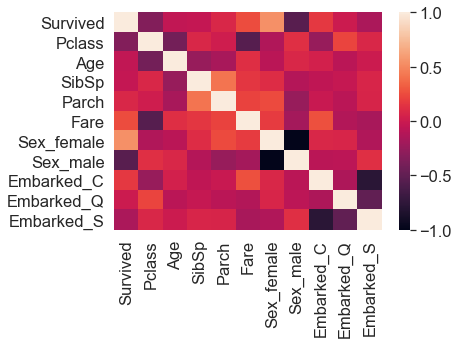

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_titanic_dummied.corr())

In [23]:
used_features = ['Pclass','Age','SibSp','Parch','Sex_female','Sex_male',
                'Embarked_C','Embarked_Q','Embarked_S']
X = df_titanic_dummied[used_features].values
y = df_titanic_dummied["Survived"]

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 9)
(268, 9)
(623,)
(268,)


In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [27]:
predictions = logreg.predict(X_test)

In [28]:
metrics.confusion_matrix(y_test, predictions)

array([[131,  22],
       [ 36,  79]], dtype=int64)

In [30]:
metrics.accuracy_score(y_test, predictions)

0.7835820895522388

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       153
           1       0.78      0.69      0.73       115

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



In [33]:
logreg.coef_

array([[-1.17692484, -0.04046302, -0.33369802,  0.06190894,  1.61601947,
        -1.20905435,  0.21016173,  0.05233891, -0.21690225]])

In [34]:
logreg.intercept_

array([3.62650212])

In [35]:
df_titanic_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [36]:
logreg.predict_proba(X_test)

array([[0.12937798, 0.87062202],
       [0.90898807, 0.09101193],
       [0.12090388, 0.87909612],
       [0.31153054, 0.68846946],
       [0.07499717, 0.92500283],
       [0.89843472, 0.10156528],
       [0.81852505, 0.18147495],
       [0.10921439, 0.89078561],
       [0.50399437, 0.49600563],
       [0.38715769, 0.61284231],
       [0.91228059, 0.08771941],
       [0.39107246, 0.60892754],
       [0.76158377, 0.23841623],
       [0.79029949, 0.20970051],
       [0.31153054, 0.68846946],
       [0.52730874, 0.47269126],
       [0.93163852, 0.06836148],
       [0.93308289, 0.06691711],
       [0.94196367, 0.05803633],
       [0.22811459, 0.77188541],
       [0.93245618, 0.06754382],
       [0.90795368, 0.09204632],
       [0.03541214, 0.96458786],
       [0.70716163, 0.29283837],
       [0.26864719, 0.73135281],
       [0.91854427, 0.08145573],
       [0.05302762, 0.94697238],
       [0.27441772, 0.72558228],
       [0.76947383, 0.23052617],
       [0.04933593, 0.95066407],
       [0.